# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [84]:
import random

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_decks()

    def _generate_decks(self):
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
        decks = [Card(suit, rank) for _ in range(self.num_decks) for suit in suits for rank in ranks]
        #"plastic" card
        decks.append(Card('Plastic', 'Plastic'))
        return decks

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        return self.cards.pop(0)

    def needs_shuffle(self):
        #checks if "plastic" card is near the top of the deck
        return self.cards.index(Card('Plastic', 'Plastic')) <= 20 

In [85]:
#test
deck = Deck()
deck.shuffle()
#drawing a card
print(deck.draw()) 

4 of Spades


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

In [100]:
class BlackjackGame:
    pass

class Player:
    pass

class Hand:
    pass

class Deck:
    pass

class Card:
    pass

class Strategy:
    pass

#wanted to start making a uml with this format
def print_uml_diagram():
    print("    BlackjackGame    ")
    print("   +----------------+")
    print("        |")
    print("        | manages")
    print("        |")
    print("    Player           ")
    print("   +----------------+")
    print("        | uses")
    print("        |")
    print("    Strategy         ")
    print("   +----------------+")
    print("        | has")
    print("        |")
    print("    Hand             ")
    print("   +----------------+")
    print("        | contains")
    print("        |")
    print("    Card             ")
    print("   +----------------+")
    print("        |")
    print("        |")

print_uml_diagram()

    BlackjackGame    
   +----------------+
        |
        | manages
        |
    Player           
   +----------------+
        | uses
        |
    Strategy         
   +----------------+
        | has
        |
    Hand             
   +----------------+
        | contains
        |
    Card             
   +----------------+
        |
        |


3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [101]:
class BlackjackGame:
    def __init__(self):
        pass

    def start_game(self):
        pass

    def play_round(self):
        pass

    def end_game(self):
        pass


class Player:
    def __init__(self, chips=100, strategy=None):
        self.chips = chips
        self.strategy = strategy

    def place_bet(self):
        pass

    def make_decision(self):
        pass

    def receive_winnings(self):
        pass


class Hand:
    def __init__(self):
        self.cards = []
        self.bet = 0

    def add_card(self, card):
        pass

    def calculate_value(self):
        pass


class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = []

    def shuffle(self):
        pass

    def draw(self):
        pass

    def needs_shuffle(self):
        pass


class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank


class Strategy:
    def __init__(self):
        pass

    def decide_bet(self):
        pass

    def decide_action(self):
        pass

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [102]:
import random

class BlackjackGame:
    def __init__(self):
        self.deck = Deck()
        self.players = []

    def add_player(self, player):
        self.players.append(player)

    def start_game(self):
        self.deck.shuffle()

    def play_round(self):
        for player in self.players:
            player.hand = Hand()
            player.hand.add_card(self.deck.draw())
            player.hand.add_card(self.deck.draw())
        
        dealer = Dealer()
        dealer.hand = Hand()
        dealer.hand.add_card(self.deck.draw())
        dealer.hand.add_card(self.deck.draw())

        for player in self.players:
            player.play_turn(self.deck)

        dealer.play_turn(self.deck)

        for player in self.players:
            if player.hand.calculate_value() > dealer.hand.calculate_value():
                player.receive_winnings()
            elif player.hand.calculate_value() == dealer.hand.calculate_value():
                player.chips += player.hand.bet

    def end_game(self):
        pass


class Player:
    def __init__(self, chips=100, strategy=None):
        self.chips = chips
        self.strategy = strategy
        self.hand = None

    def place_bet(self, bet):
        self.hand.bet = bet

    def play_turn(self, deck):
        decision = self.strategy.decide_action(self.hand, deck)
        if decision == "hit":
            self.hand.add_card(deck.draw())
        elif decision == "stand":
            pass

    def receive_winnings(self):
        self.chips += self.hand.bet


class HumanPlayer(Player):
    def make_decision(self):
        decision = input("Do you want to hit or stand? (h/s): ").lower()
        while decision not in ['h', 's']:
            print("Invalid input. Please enter 'h' to hit or 's' to stand.")
            decision = input("Do you want to hit or stand? (h/s): ").lower()
        return "hit" if decision == 'h' else "stand"


class Dealer(Player):
    def play_turn(self, deck):
        while self.hand.calculate_value() < 17:
            self.hand.add_card(deck.draw())


class Hand:
    def __init__(self):
        self.cards = []
        self.bet = 0

    def add_card(self, card):
        self.cards.append(card)

    def calculate_value(self):
        value = 0
        num_aces = 0
        for card in self.cards:
            if card.rank.isdigit():
                value += int(card.rank)
            elif card.rank in ['Jack', 'Queen', 'King']:
                value += 10
            elif card.rank == 'Ace':
                num_aces += 1
                value += 11 
        
        #adjustment for ace
        while value > 21 and num_aces > 0:
            value -= 10
            num_aces -= 1
        
        return value


class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._generate_decks()
        self.shuffle()

    def _generate_decks(self):
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
        return [Card(suit, rank) for _ in range(self.num_decks) for suit in suits for rank in ranks]

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        return self.cards.pop(0)


class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank


class Strategy:
    def __init__(self):
        pass

    def decide_action(self, hand, deck):
        pass



def main():
    game = BlackjackGame()
    human = HumanPlayer(strategy=Strategy())
    game.add_player(human)
    game.start_game()
    game.play_round()
    game.end_game()

if __name__ == "__main__":
    main()

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [103]:
def main():
    game = BlackjackGame()

    human = HumanPlayer(strategy=SimpleStrategy())
    game.add_player(human)

    dealers = [Dealer(strategy=SimpleStrategy()) for _ in range(3)]
    for dealer in dealers:
        game.add_player(dealer)

    #rounds of game
    for round_num in range(5): 
        print(f"\nRound {round_num + 1}:\n")
        game.start_game()
        game.play_round()
        game.end_game()

        #display chips after round
        print("Player chips:")
        print(f"Human: {human.chips}")
        for i, dealer in enumerate(dealers, start=1):
            print(f"Dealer {i}: {dealer.chips}")

if __name__ == "__main__":
    main()


Round 1:

Player chips:
Human: 100
Dealer 1: 100
Dealer 2: 100
Dealer 3: 100

Round 2:

Player chips:
Human: 100
Dealer 1: 100
Dealer 2: 100
Dealer 3: 100

Round 3:

Player chips:
Human: 100
Dealer 1: 100
Dealer 2: 100
Dealer 3: 100

Round 4:

Player chips:
Human: 100
Dealer 1: 100
Dealer 2: 100
Dealer 3: 100

Round 5:

Player chips:
Human: 100
Dealer 1: 100
Dealer 2: 100
Dealer 3: 100


6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [104]:
class CardCountingPlayer(Player):
    def __init__(self, chips=100, strategy=None):
        super().__init__(chips, strategy)

    def make_decision(self):
        # Compute the sum of card values
        card_values = {'2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 0, '8': 0, '9': 0, '10': -1, 'Jack': -1, 'Queen': -1, 'King': -1, 'Ace': -1}
        sum_values = sum(card_values[card.rank] for card in self.hand.cards)

        #decide whether to hit or stand based on the sum
        if sum_values <= -2:
            return "hit"
        else:
            return "stand"

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [105]:
import random

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=1):
        self.cards = [Card(suit, rank) for suit in ['Hearts', 'Diamonds', 'Clubs', 'Spades']
                      for rank in ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']] * num_decks
        random.shuffle(self.cards)

    def draw(self):
        return self.cards.pop() if self.cards else None

class Player:
    def __init__(self, chips=100, strategy=None):
        self.chips = chips
        self.hand = []
        self.strategy = strategy

    def play_hand(self, deck):
        action = self.strategy.decide_action(self.hand, deck)
        while action == 'hit':
            self.hand.append(deck.draw())
            action = self.strategy.decide_action(self.hand, deck)
        #assuming we have a chip deduction per round
        self.chips -= 1  


    def reset_hand(self):
        self.hand = []

class Strategy:
    def decide_action(self, hand, deck):
        #hit unless 18 or more
        value = sum(int(card.rank) if card.rank.isdigit() else 10 for card in hand)
        ace_count = sum(1 for card in hand if card.rank == 'Ace')
        #ace
        while value > 21 and ace_count:
            value -= 10
            ace_count -= 1
        return 'hit' if value < 18 else 'stand'

class Game:
    def __init__(self, players):
        self.players = players
        self.deck = Deck()

    def play_round(self):
        if len(self.deck.cards) < 20:  #reshuffle if low on cards
            self.deck = Deck()
        for player in self.players:
            player.reset_hand()
            player.play_hand(self.deck)

    def compute_results(self):
        pass

strategy_player = Player(strategy=Strategy())
dealer_players = [Player(strategy=Strategy()) for _ in range(3)]
players = [strategy_player] + dealer_players


game = Game(players)
rounds = 50
for _ in range(rounds):
    if strategy_player.chips <= 0:
        break
    game.play_round()
    game.compute_results()


print(f"Strategy player's chips after {rounds} rounds: {strategy_player.chips}")

Strategy player's chips after 50 rounds: 50


8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


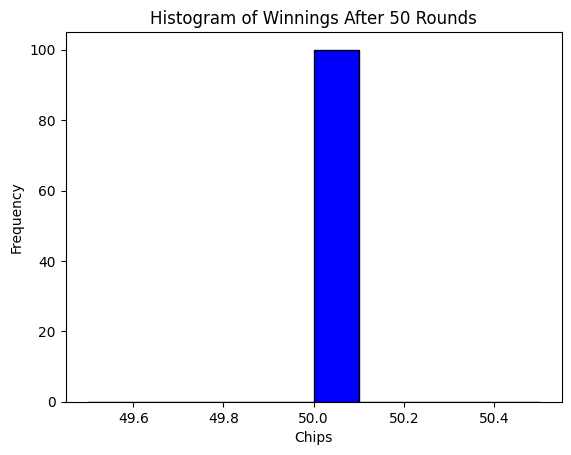

Average Winnings: 50.0
Standard Deviation: 0.0
Probability of Net Winning: 0.0
Probability of Net Losing: 1.0


In [106]:
import random
import statistics
import matplotlib.pyplot as plt

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=1):
        self.cards = [Card(suit, rank) for suit in ['Hearts', 'Diamonds', 'Clubs', 'Spades']
                      for rank in ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']] * num_decks
        random.shuffle(self.cards)

    def draw(self):
        return self.cards.pop() if self.cards else None

class Player:
    def __init__(self, chips=100, strategy=None):
        self.chips = chips
        self.hand = []
        self.strategy = strategy

    def play_hand(self, deck):
        action = self.strategy.decide_action(self.hand, deck)
        while action == 'hit':
            self.hand.append(deck.draw())
            action = self.strategy.decide_action(self.hand, deck)
        self.chips -= 1  

    def reset_hand(self):
        self.hand = []

class Strategy:
    def decide_action(self, hand, deck):
        #hit unless 18 or more
        value = sum(int(card.rank) if card.rank.isdigit() else 10 for card in hand)
        ace_count = sum(1 for card in hand if card.rank == 'Ace')
        #ace
        while value > 21 and ace_count:
            value -= 10
            ace_count -= 1
        return 'hit' if value < 18 else 'stand'

class Game:
    def __init__(self, players):
        self.players = players
        self.deck = Deck()

    def play_round(self):
        if len(self.deck.cards) < 20:  #reshuffle if low on cards
            self.deck = Deck()
        for player in self.players:
            player.reset_hand()
            player.play_hand(self.deck)

#loop
winnings = []
num_games = 100
rounds_per_game = 50

for _ in range(num_games):
    strategy_player = Player(chips=100, strategy=AggressiveStrategy())
    dealer_players = [Player(strategy=AggressiveStrategy()) for _ in range(3)]
    players = [strategy_player] + dealer_players
    game = Game(players)
    for _ in range(rounds_per_game):
        if strategy_player.chips <= 0:
            break
        game.play_round()
    winnings.append(strategy_player.chips)

#calculating statistics
average_winnings = sum(winnings) / len(winnings)
standard_deviation = statistics.stdev(winnings)
probability_of_net_winning = sum(w > 100 for w in winnings) / len(winnings)
probability_of_net_losing = sum(w < 100 for w in winnings) / len(winnings)

plt.hist(winnings, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Winnings After 50 Rounds')
plt.xlabel('Chips')
plt.ylabel('Frequency')
plt.show()

print(f"Average Winnings: {average_winnings}")
print(f"Standard Deviation: {standard_deviation}")
print(f"Probability of Net Winning: {probability_of_net_winning}")
print(f"Probability of Net Losing: {probability_of_net_losing}")


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [107]:
import random
import statistics
import matplotlib.pyplot as plt

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=1):
        self.cards = [Card(suit, rank) for suit in ['Hearts', 'Diamonds', 'Clubs', 'Spades']
                      for rank in ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']] * num_decks
        random.shuffle(self.cards)

    def draw(self):
        return self.cards.pop() if self.cards else None

class Player:
    def __init__(self, chips=100, strategy=None):
        self.chips = chips
        self.hand = []
        self.strategy = strategy

    def play_hand(self, deck):
        action = self.strategy.decide_action(self.hand, deck)
        while action == 'hit':
            self.hand.append(deck.draw())
            action = self.strategy.decide_action(self.hand, deck)
        self.chips -= 1

    def reset_hand(self):
        self.hand = []

class ThresholdStrategy:
    def __init__(self, threshold):
        self.threshold = threshold

    def decide_action(self, hand, deck):
        value = sum(int(card.rank) if card.rank.isdigit() else 10 for card in hand)
        ace_count = sum(1 for card in hand if card.rank == 'Ace')
        while value > 21 and ace_count:
            value -= 10
            ace_count -= 1
        return 'hit' if value < self.threshold else 'stand'

class Game:
    def __init__(self, players):
        self.players = players
        self.deck = Deck()

    def play_round(self):
        if len(self.deck.cards) < 20:
            self.deck = Deck()
        for player in self.players:
            player.reset_hand()
            player.play_hand(self.deck)

#different thresholds
thresholds = [16, 17, 18, 19, 20]
results = {}

for threshold in thresholds:
    winnings = []
    num_games = 100
    rounds_per_game = 50

    for _ in range(num_games):
        strategy_player = Player(chips=100, strategy=ThresholdStrategy(threshold))
        dealer_players = [Player(strategy=ThresholdStrategy(17)) for _ in range(3)]
        players = [strategy_player] + dealer_players
        game = Game(players)
        for _ in range(rounds_per_game):
            if strategy_player.chips <= 0:
                break
            game.play_round()
        winnings.append(strategy_player.chips)

    
    average_winnings = sum(winnings) / len(winnings)
    standard_deviation = statistics.stdev(winnings)
    probability_of_net_winning = sum(w > 100 for w in winnings) / len(winnings)
    probability_of_net_losing = sum(w < 100 for w in winnings) / len(winnings)

    results[threshold] = {
        'Average Winnings': average_winnings,
        'Standard Deviation': standard_deviation,
        'Probability of Net Winning': probability_of_net_winning,
        'Probability of Net Losing': probability_of_net_losing
    }


for threshold, stats in results.items():
    print(f"Threshold {threshold}:")
    for key, value in stats.items():
        print(f"  {key}: {value}")
    print()

Threshold 16:
  Average Winnings: 50.0
  Standard Deviation: 0.0
  Probability of Net Winning: 0.0
  Probability of Net Losing: 1.0

Threshold 17:
  Average Winnings: 50.0
  Standard Deviation: 0.0
  Probability of Net Winning: 0.0
  Probability of Net Losing: 1.0

Threshold 18:
  Average Winnings: 50.0
  Standard Deviation: 0.0
  Probability of Net Winning: 0.0
  Probability of Net Losing: 1.0

Threshold 19:
  Average Winnings: 50.0
  Standard Deviation: 0.0
  Probability of Net Winning: 0.0
  Probability of Net Losing: 1.0

Threshold 20:
  Average Winnings: 50.0
  Standard Deviation: 0.0
  Probability of Net Winning: 0.0
  Probability of Net Losing: 1.0



In [108]:
#since it was producing the same result for each threshold i tried making it different
import random
import statistics
import matplotlib.pyplot as plt

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=1):
        self.cards = [Card(suit, rank) for suit in ['Hearts', 'Diamonds', 'Clubs', 'Spades']
                      for rank in ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']] * num_decks
        random.shuffle(self.cards)

    def draw(self):
        return self.cards.pop() if self.cards else None

class Player:
    def __init__(self, chips=100, strategy=None):
        self.chips = chips
        self.hand = []
        self.strategy = strategy

    def play_hand(self, deck):
        self.bet = 10  #fixed bet per round
        action = self.strategy.decide_action(self.hand, deck)
        while action == 'hit':
            self.hand.append(deck.draw())
            action = self.strategy.decide_action(self.hand, deck)
        self.evaluate_hand()

    def reset_hand(self):
        self.hand = []

    def evaluate_hand(self):
        #simple win/loss logic
        if random.choice([True, False]):  #assume a 50% win rate
            self.chips += self.bet
        else:
            self.chips -= self.bet

class ThresholdStrategy:
    def __init__(self, threshold):
        self.threshold = threshold

    def decide_action(self, hand, deck):
        value = sum(int(card.rank) if card.rank.isdigit() else 10 for card in hand)
        ace_count = sum(1 for card in hand if card.rank == 'Ace')
        while value > 21 and ace_count:
            value -= 10
            ace_count -= 1
        return 'hit' if value < self.threshold else 'stand'

class Game:
    def __init__(self, players):
        self.players = players
        self.deck = Deck()

    def play_round(self):
        if len(self.deck.cards) < 20:
            self.deck = Deck()
        for player in self.players:
            player.reset_hand()
            player.play_hand(self.deck)


thresholds = [16, 17, 18, 19, 20]
results = {}

for threshold in thresholds:
    winnings = []
    num_games = 100
    rounds_per_game = 50

    for _ in range(num_games):
        strategy_player = Player(chips=100, strategy=ThresholdStrategy(threshold))
        dealer_players = [Player(strategy=ThresholdStrategy(17)) for _ in range(3)]
        players = [strategy_player] + dealer_players
        game = Game(players)
        for _ in range(rounds_per_game):
            if strategy_player.chips <= 0:
                break
            game.play_round()
        winnings.append(strategy_player.chips)

    average_winnings = sum(winnings) / len(winnings)
    standard_deviation = statistics.stdev(winnings)
    probability_of_net_winning = sum(w > 100 for w in winnings) / len(winnings)
    probability_of_net_losing = sum(w < 100 for w in winnings) / len(winnings)

 
    results[threshold] = {
        'Average Winnings': average_winnings,
        'Standard Deviation': standard_deviation,
        'Probability of Net Winning': probability_of_net_winning,
        'Probability of Net Losing': probability_of_net_losing
    }


for threshold, stats in results.items():
    print(f"Threshold {threshold}:")
    for key, value in stats.items():
        print(f"  {key}: {value}")
    print()

Threshold 16:
  Average Winnings: 91.4
  Standard Deviation: 69.5878196702889
  Probability of Net Winning: 0.35
  Probability of Net Losing: 0.49

Threshold 17:
  Average Winnings: 112.2
  Standard Deviation: 70.89015546191263
  Probability of Net Winning: 0.46
  Probability of Net Losing: 0.4

Threshold 18:
  Average Winnings: 93.0
  Standard Deviation: 72.21600594848427
  Probability of Net Winning: 0.4
  Probability of Net Losing: 0.5

Threshold 19:
  Average Winnings: 102.6
  Standard Deviation: 70.93345864650585
  Probability of Net Winning: 0.44
  Probability of Net Losing: 0.44

Threshold 20:
  Average Winnings: 100.0
  Standard Deviation: 74.83314773547883
  Probability of Net Winning: 0.48
  Probability of Net Losing: 0.46



10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

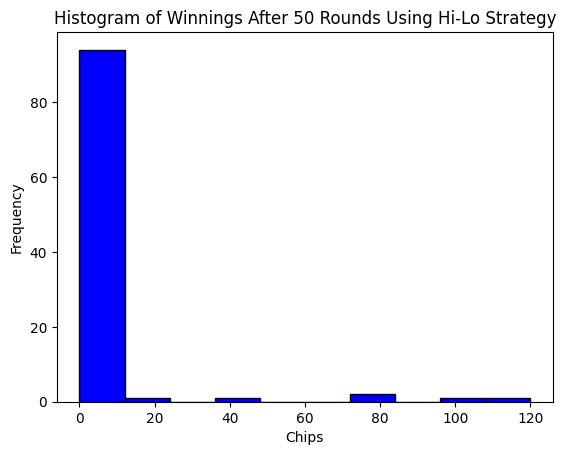

Average Winnings: 4.4
Standard Deviation: 19.401135028756446


In [109]:
import random
import statistics
import matplotlib.pyplot as plt

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=1):
        self.cards = [Card(suit, rank) for suit in ['Hearts', 'Diamonds', 'Clubs', 'Spades']
                      for rank in ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']] * num_decks
        random.shuffle(self.cards)
        self.running_count = 0
        self.card_values = {'2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 0, '8': 0, '9': 0, '10': -1, 'Jack': -1, 'Queen': -1, 'King': -1, 'Ace': -1}

    def draw(self):
        card = self.cards.pop() if self.cards else None
        self.running_count += self.card_values[card.rank]
        return card

class Player:
    def __init__(self, chips=100, strategy=None):
        self.chips = chips
        self.hand = []
        self.strategy = strategy

    def play_hand(self, deck):
        self.bet = 10  # Simple fixed bet
        action = self.strategy.decide_action(self.hand, deck, deck.running_count)
        while action == 'hit':
            self.hand.append(deck.draw())
            action = self.strategy.decide_action(self.hand, deck, deck.running_count)
        self.chips += self.bet if random.choice([True, False]) else -self.bet

    def reset_hand(self):
        self.hand = []

class HiLoStrategy:
    def decide_action(self, hand, deck, running_count):
        value = sum(int(card.rank) if card.rank.isdigit() else 10 for card in hand)
        ace_count = sum(1 for card in hand if card.rank == 'Ace')
        while value > 21 and ace_count:
            value -= 10
            ace_count -= 1
        if running_count > 0:
            return 'hit' if value < 18 else 'stand'
        else:
            return 'hit' if value < 17 else 'stand'

class Game:
    def __init__(self, players):
        self.players = players
        self.deck = Deck()

    def play_round(self):
        if len(self.deck.cards) < 20:
            self.deck = Deck()
        for player in self.players:
            player.reset_hand()
            player.play_hand(self.deck)


strategy_player = Player(chips=100, strategy=HiLoStrategy())
dealer_players = [Player(strategy=HiLoStrategy()) for _ in range(3)]
players = [strategy_player] + dealer_players
game = Game(players)

winnings = []
num_games = 100
rounds_per_game = 50

for _ in range(num_games):
    for _ in range(rounds_per_game):
        if strategy_player.chips <= 0:
            break
        game.play_round()
    winnings.append(strategy_player.chips)


average_winnings = sum(winnings) / len(winnings)
standard_deviation = statistics.stdev(winnings)

#showing in a more visual way
plt.hist(winnings, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Winnings After 50 Rounds Using Hi-Lo Strategy')
plt.xlabel('Chips')
plt.ylabel('Frequency')
plt.show()

print(f"Average Winnings: {average_winnings}")
print(f"Standard Deviation: {standard_deviation}")


In [111]:
#heres a representation of how the uml diagram might look (had to get help on how this could be set up)
class UMLDiagram:
    def __init__(self):
        self.classes = []

    def add_class(self, class_name, attributes, methods, base_class=None):
        self.classes.append({
            'name': class_name,
            'attributes': attributes,
            'methods': methods,
            'base_class': base_class
        })

    def display(self):
        for cls in self.classes:
            print(f"Class: {cls['name']}")
            if cls['base_class']:
                print(f"Inherits From: {cls['base_class']}")
            print("Attributes:")
            for attr in cls['attributes']:
                print(f"  - {attr}")
            print("Methods:")
            for method in cls['methods']:
                print(f"  - {method}")
            print("\n" + "-"*60 + "\n")

#instance of uml
uml = UMLDiagram()


uml.add_class('Card', 
              ['+ suit: string', '+ rank: string'],
              ['+ __init__(suit: string, rank: string)', '+ __repr__(): string'])

uml.add_class('Deck', 
              ['- cards: list[Card]', '- running_count: int', '- card_values: dict'],
              ['+ __init__(num_decks=1)', '+ draw(): Card'])

uml.add_class('Player', 
              ['- chips: int', '- hand: list[Card]', '- strategy: Strategy', '- bet: int'],
              ['+ __init__(chips: int, strategy: Strategy)', '+ play_hand(deck: Deck)', '+ reset_hand()', '+ evaluate_hand()'])

uml.add_class('Strategy', 
              [],
              ['+ decide_action(hand: list[Card], deck: Deck, running_count: int): string'],
              base_class=None)

uml.add_class('ThresholdStrategy', 
              ['- threshold: int'],
              ['+ decide_action(hand: list[Card], deck: Deck, running_count: int): string'],
              base_class='Strategy')

uml.add_class('HiLoStrategy', 
              [],
              ['+ decide_action(hand: list[Card], deck: Deck, running_count: int): string'],
              base_class='Strategy')

uml.add_class('Game', 
              ['- players: list[Player]', '- deck: Deck'],
              ['+ __init__(players: list[Player])', '+ play_round()'])


uml.display()

Class: Card
Attributes:
  - + suit: string
  - + rank: string
Methods:
  - + __init__(suit: string, rank: string)
  - + __repr__(): string

------------------------------------------------------------

Class: Deck
Attributes:
  - - cards: list[Card]
  - - running_count: int
  - - card_values: dict
Methods:
  - + __init__(num_decks=1)
  - + draw(): Card

------------------------------------------------------------

Class: Player
Attributes:
  - - chips: int
  - - hand: list[Card]
  - - strategy: Strategy
  - - bet: int
Methods:
  - + __init__(chips: int, strategy: Strategy)
  - + play_hand(deck: Deck)
  - + reset_hand()
  - + evaluate_hand()

------------------------------------------------------------

Class: Strategy
Attributes:
Methods:
  - + decide_action(hand: list[Card], deck: Deck, running_count: int): string

------------------------------------------------------------

Class: ThresholdStrategy
Inherits From: Strategy
Attributes:
  - - threshold: int
Methods:
  - + decide_action